# Heatmap Plotting

In this tutorial, we will demonstrate how to use the `heatmap` function from the `pymovements.plotting` module to create a heatmap of gaze data. The heatmap will show the distribution of gaze positions across the experiment screen, with color values indicating the time spent at each position in seconds.

In [31]:
import pymovements as pm

## Loading the Dataset

For demonstration purposes, we will use the `ToyDataset` from `pymovements.datasets`.

In [32]:
# Load Data
dataset = pm.datasets.ToyDataset(
    root='data/',
    download=True,
    extract=True,
    remove_finished=True,
)

pymovements-toy-dataset.zip: 0.00B [00:00, ?B/s]

After loading the dataset, we will transform the pixel coordinates to degrees.

In [33]:
dataset.load()
dataset.pix2deg()

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Now our available columns for each GazeDataFrame are the following. We will use the `x_right_pos` and `y_right_pos` columns for plotting. However, it is also possible to use the pixel data columns `x_right_pix` and `y_right_pix`.

In [34]:
dataset.gaze[5].frame

text_id,page_id,time,x_right_pix,y_right_pix,y_right_pos,x_right_pos
i64,i64,f64,f64,f64,f64,f64
1,1,2.415266e6,176.8,140.2,-12.297242,-8.259494
1,1,2.415267e6,176.7,139.8,-12.306793,-8.261927
1,1,2.415268e6,176.7,139.3,-12.318732,-8.261927
1,1,2.415269e6,176.6,139.3,-12.318732,-8.264361
1,1,2.41527e6,176.7,139.3,-12.318732,-8.261927
1,1,2.415271e6,176.8,139.5,-12.313957,-8.259494
1,1,2.415272e6,177.3,139.8,-12.306793,-8.247325
1,1,2.415273e6,177.8,140.0,-12.302018,-8.235155
1,1,2.415274e6,178.3,140.0,-12.302018,-8.222985


## Creating a Heatmap

Let's create a heatmap using the `heatmap` function from the `pymovements` library. We will use the default `gridsize` of 10x10 with interpolation and display the colorbar.

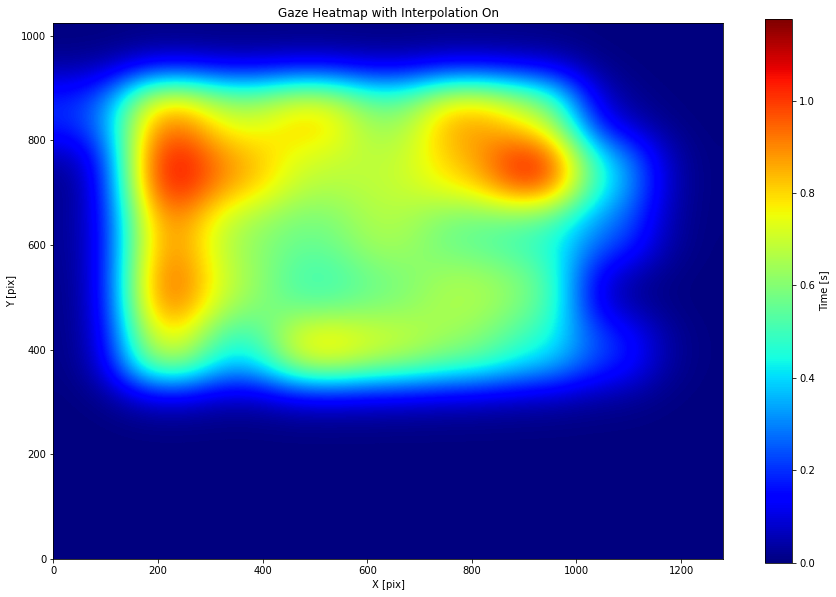

In [56]:
figure = pm.plotting.heatmap(
    gaze=dataset.gaze[5],
    position_columns=('x_right_pix', 'y_right_pix'),
    origin='upper',
    show_cbar=True,
    cbar_label='Time [s]',
    title='Gaze Heatmap with Interpolation On',
    xlabel='X [pix]',
    ylabel='Y [pix]',
    gridsize=[10, 10]
)

To better understand the effect of the `gridsize` parameter on the heatmap, we can turn off the interpolation. By doing this, we can clearly visualize the individual bins used to calculate the heatmap. With interpolation turned off, the heatmap will display the raw bin values rather than a smoothed representation.

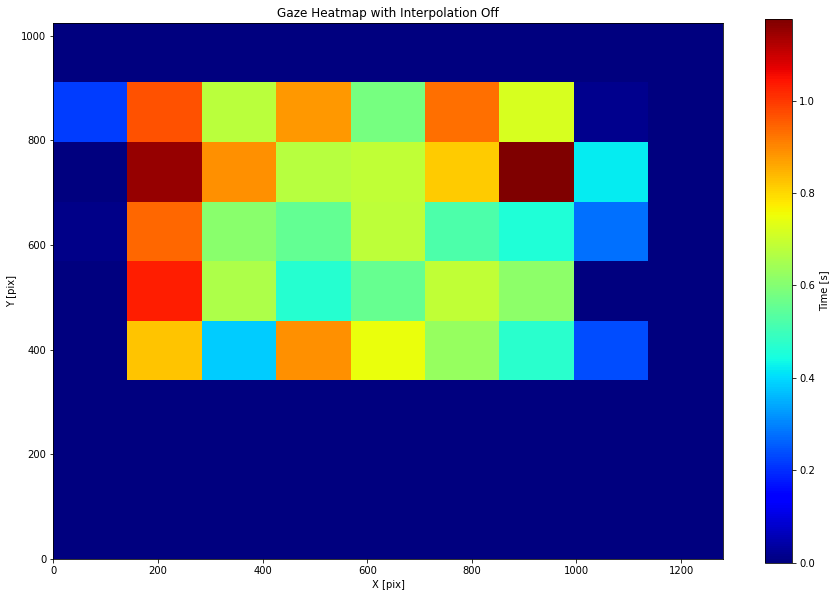

In [55]:
figure = pm.plotting.heatmap(
    dataset.gaze[5],
    position_columns=('x_right_pix', 'y_right_pix'),
    origin='upper',
    show_cbar=True,
    cbar_label='Time [s]',
    title='Gaze Heatmap with Interpolation Off',
    xlabel='X [pix]',
    ylabel='Y [pix]',
    gridsize=[10, 10],
    interpolation='none'
)

Increasing the `gridsize` parameter results in a finer grid and more detailed heatmap representation. With a higher grid size, we divide the plot into smaller bins, which can capture more nuances in the data distribution

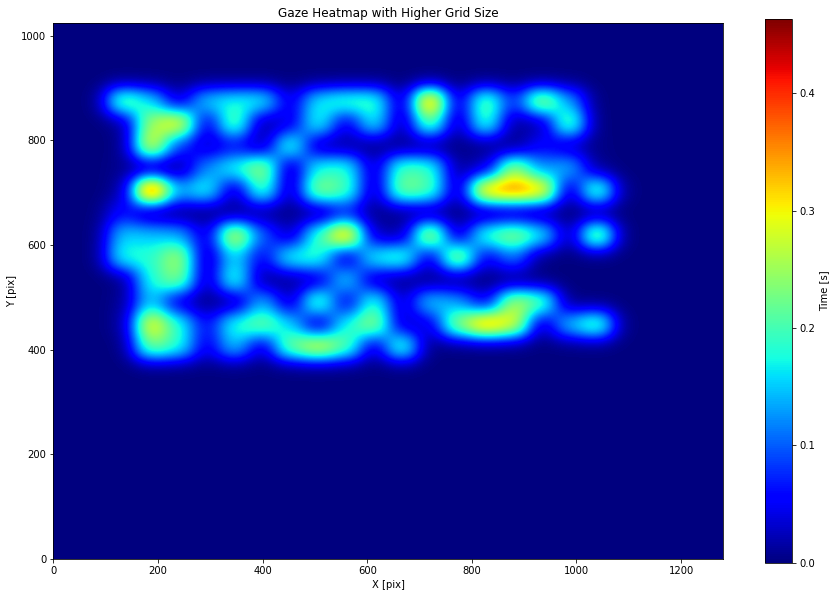

In [54]:
figure = pm.plotting.heatmap(
    dataset.gaze[5],
    position_columns=('x_right_pix', 'y_right_pix'),
    origin='upper',
    show_cbar=True,
    cbar_label='Time [s]',
    title='Gaze Heatmap with Higher Grid Size',
    xlabel='X [pix]',
    ylabel='Y [pix]',
    gridsize=[25, 25]
)